In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
us_health = pd.read_csv("UShealth (2).csv")
us_health

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
### 1. Iz prikaza se može vidjeti da su kategorijske varijable: sex, children, smoker, region
### dok su age, bmi, charges numeričke varijable

In [4]:
us_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
### 2. Provjeravam imaju li sve čelije vrijednosti, ako sve varijable imaju vrijednost 0 onda 
### su sve čelije popunjene

In [6]:
us_health.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
### 3. Funkcija describe()

In [8]:
us_health.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
### 3.1
    ### Rezultat nam govori da je medijan vrlo blizu srednjoj vrijednosti za varijable: age, bmi i 
    ### children što znači da je razdioba relativno simetrična te nema puno ekstremnih vrijednosti tj. 
    ### nema "outliera"
    
    ### 25% (prvi kvartil) - 25% uzoraka je mlađe od 27 godina
    ### 75% (treći kvartil) - 75% urozaka je mlađe od 51 godinu
    ### age - razlika između min i max za charges je jako velika *** mogućnost pojave outliera

    ### 25% (prvi kvartil) - 25% uzoraka ima BMI manji od 26,29
    ### 75% (treći kvartil) - 75% urozaka ima BMI manji od 34,69
    
    ### kod charges se može primjetiti kako je srednja vrijednost dosta veća od medijana iz čega se 
    ### može zaključiti kako su neki ekstremni torškovi povisili prosjek

# Istraživački dio analize - grupiranje prema kategorijama + vizualizacija

## Grupiranje kategorijskih varijabli

In [10]:
## koliko ima uzoraka prema spolu?

In [11]:
us_health["sex"].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

<Axes: ylabel='count'>

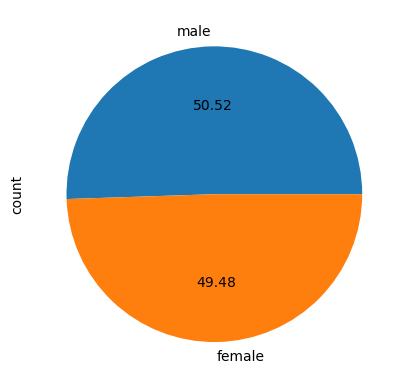

In [12]:
us_health['sex'].value_counts().plot(kind='pie', autopct='%.2f')

In [13]:
## Koliko je ukupan broj pušača i nepušača

In [14]:
us_health["smoker"].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

<Axes: ylabel='count'>

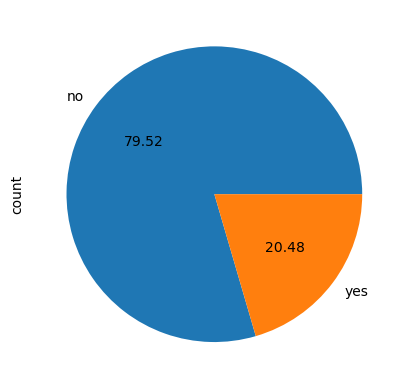

In [15]:
us_health['smoker'].value_counts().plot(kind='pie', autopct='%.2f')

In [16]:
## Koliko je uzoraka prema regijama

In [17]:
us_health["region"].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

<Axes: ylabel='count'>

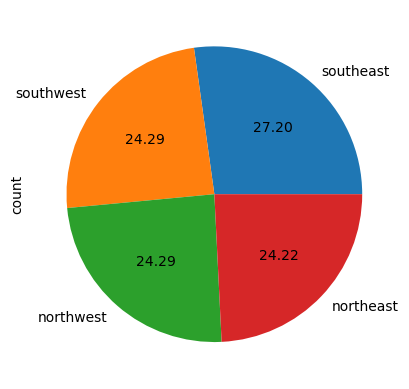

In [18]:
us_health['region'].value_counts().plot(kind='pie', autopct='%.2f')

In [19]:
### Zaključak: broj uzoraka prema regiji je podjednak kao i broj uzoraka prema spolu. 
### Broj nepušača je daleko veći od pušača. Omjer 80/20

In [20]:
smoker = us_health.groupby(["smoker"])["charges"].agg(
    Min='min',
    Mean='mean',
    Max='max'
).reset_index()
smoker

,smoker,Min,Mean,Max
0,no,1121.8739,8434.268298,36910.60803
1,yes,12829.4551,32050.231832,63770.42801


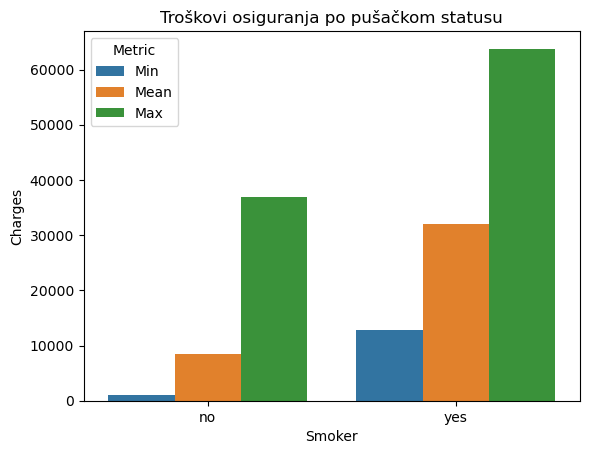

In [21]:
smoker_melt = smoker.melt(id_vars='smoker', value_vars=['Min', 'Mean', 'Max'],
                          var_name='Metric', value_name='Charges')

sns.barplot(data=smoker_melt, x='smoker', y='Charges', hue='Metric')
plt.title('Troškovi osiguranja po pušačkom statusu')
plt.ylabel('Charges')
plt.xlabel('Smoker')
plt.show()

In [22]:
## Zaključak: troškovi osiguranja su veći za pušače

In [23]:
sex_group = us_health.groupby(["sex"])["charges"].agg(
    Min='min',
    Mean='mean',
    Max='max'
).reset_index()
sex_group

,sex,Min,Mean,Max
0,female,1607.5101,12569.578844,63770.42801
1,male,1121.8739,13956.751178,62592.87309


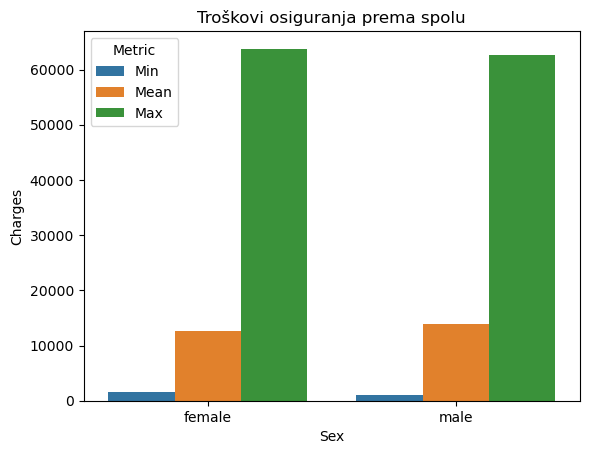

In [24]:
sex_melt = sex_group.melt(id_vars='sex', value_vars=['Min', 'Mean', 'Max'],
                          var_name='Metric', value_name='Charges')

sns.barplot(data=sex_melt, x='sex', y='Charges', hue='Metric')
plt.title('Troškovi osiguranja prema spolu')
plt.ylabel('Charges')
plt.xlabel('Sex')
plt.show()

In [25]:
## Zaključak: troškovi osiguranja su podjednaki za oba spola

In [26]:
def bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi < 25:
        return 'Optimal'
    elif bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

us_health['bmi_group'] = us_health['bmi'].apply(bmi_category)

us_health



,age,sex,bmi,children,smoker,region,charges,bmi_group
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,Obese
2,28,male,33.000,3,no,southeast,4449.46200,Obese
3,33,male,22.705,0,no,northwest,21984.47061,Optimal
4,32,male,28.880,0,no,northwest,3866.85520,Overweight
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,Obese
1334,18,female,31.920,0,no,northeast,2205.98080,Obese
1335,18,female,36.850,0,no,southeast,1629.83350,Obese
1336,21,female,25.800,0,no,southwest,2007.94500,Overweight


In [27]:
bmi_category = us_health.groupby(["bmi_group"])["charges"].agg(
    Min='min',
    Mean='mean',
    Max='max'
).reset_index()
bmi_category


,bmi_group,Min,Mean,Max
0,Obese,1131.5066,15552.335469,63770.42801
1,Optimal,1121.8739,10409.337709,35069.37452
2,Overweight,1252.4070,10987.509891,38245.59327
3,Underweight,1621.3402,8852.200585,32734.18630


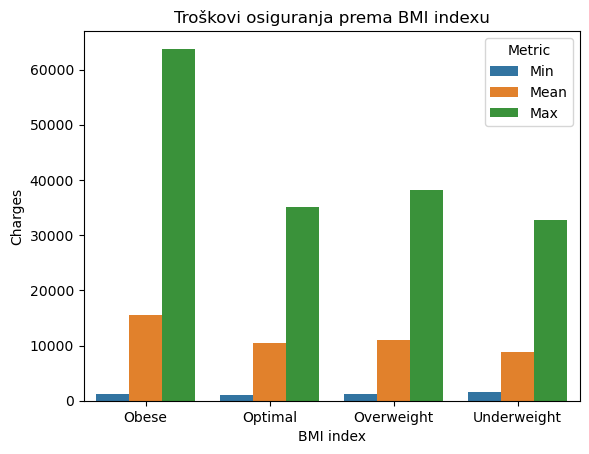

In [28]:
bmi_category_melt = bmi_category.melt(id_vars='bmi_group', value_vars=['Min', 'Mean', 'Max'],
                          var_name='Metric', value_name='Charges')

sns.barplot(data=bmi_category_melt, x='bmi_group', y='Charges', hue='Metric')
plt.title('Troškovi osiguranja prema BMI indexu')
plt.ylabel('Charges')
plt.xlabel('BMI index')
plt.show()

In [29]:
## Zaključak: troškovi osiguranja su najveći za pretile osobe

## Korelacija

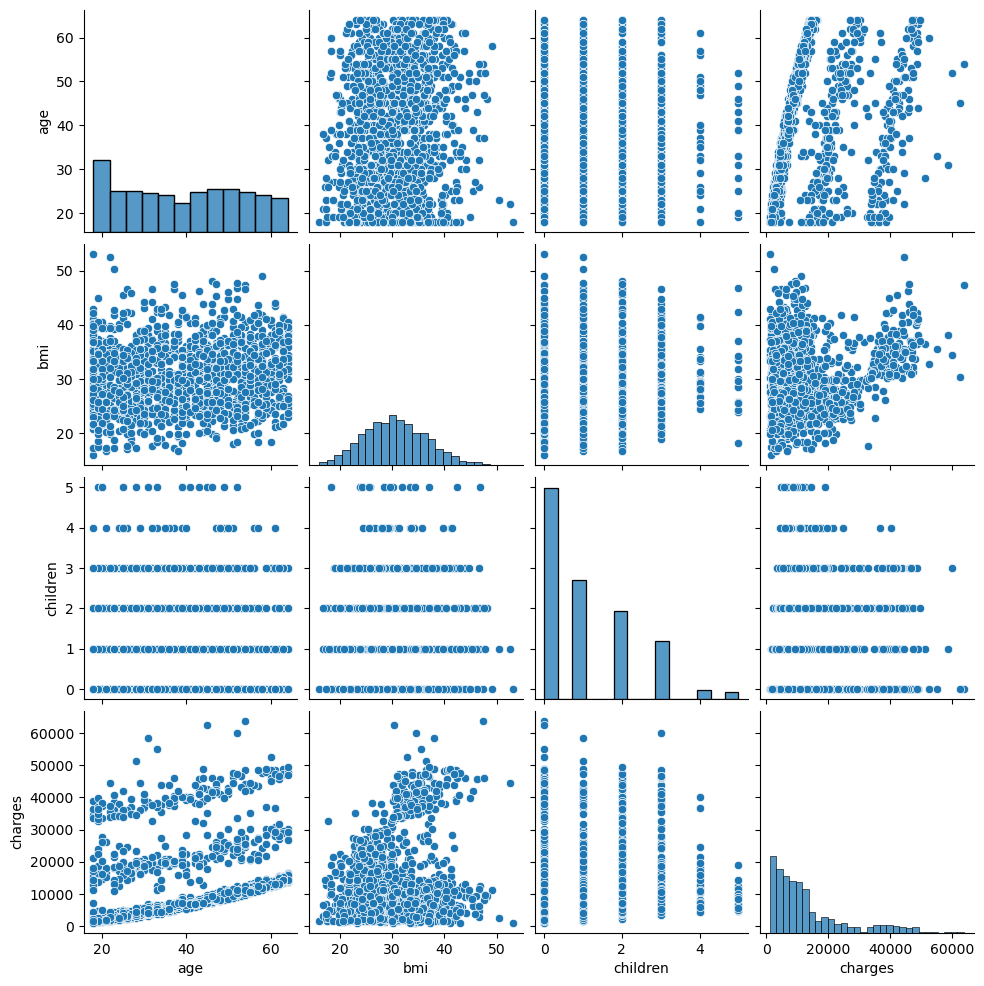

In [30]:
sns.pairplot(us_health)

In [31]:
## Zaključak: bmi jedini ima normalnu razdiobu, dok children i charges imaju samo desni odsječak 
## razdiobe. Iz tog proizlazi da bi nad charges trebalo napraviti "log1p" transformaciju

## ostali grafovi: nema korelacije ili su podaci jako raspršeni

In [32]:
us_health.corr(numeric_only=True)

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


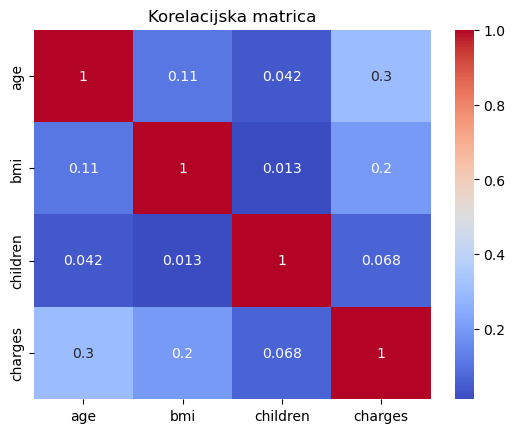

In [33]:
sns.heatmap(us_health.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Korelacijska matrica')
plt.show()

In [34]:
## Zaključak: charges najbolje korelira sa age = 0.3

In [35]:
us_health['log_charges'] = np.log1p(us_health['charges'])

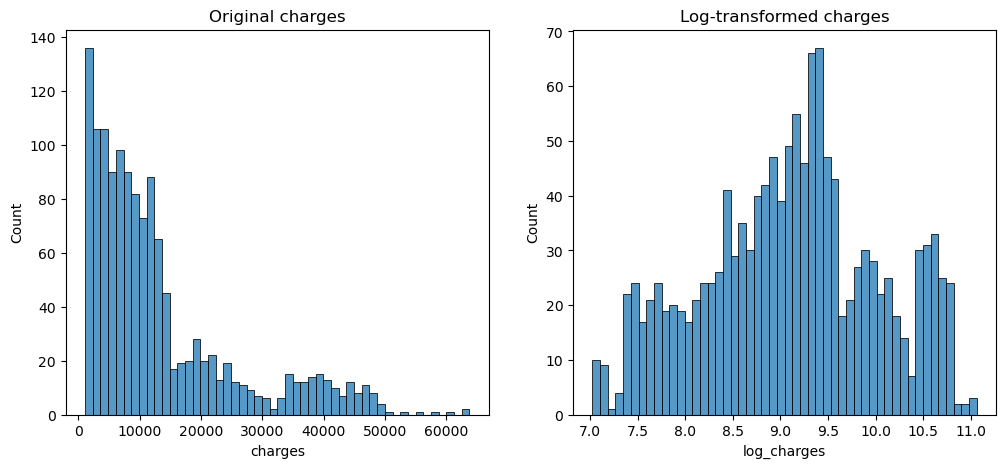

In [36]:
fig, axs = plt.subplots(1, 2, figsize=(12,5))

sns.histplot(us_health['charges'], bins=50, ax=axs[0])
axs[0].set_title('Original charges')

sns.histplot(us_health['log_charges'], bins=50, ax=axs[1])
axs[1].set_title('Log-transformed charges')

plt.show()

In [37]:
## Transformirani podaci koji imaju normalnu razdiobu za razliku od početnog stanja

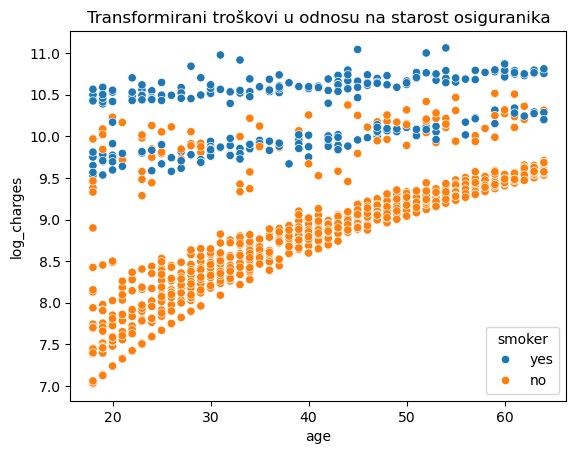

In [38]:
sns.scatterplot(data=us_health, x='age', y='log_charges', hue='smoker')
plt.title('Transformirani troškovi u odnosu na starost osiguranika')
plt.show()

In [39]:
## Troškovi osiguranja u odnosu na starost korisnika (pušač/nepušač)

### Zadatak 2

In [40]:
dostava = pd.read_excel("dostava.xlsx")
dostava

,Udaljenost,BrDostava,CijenaGoriva,Vrijeme
0,89,4,3.84,7.0
1,66,1,3.19,5.4
2,78,3,3.78,6.6
3,111,6,3.89,7.4
4,44,1,3.57,4.8
5,77,3,3.57,6.4
6,80,3,3.03,7.0
7,66,2,3.51,5.6
8,109,5,3.54,7.3
9,78,3,3.25,6.4


In [41]:
### dataframe ima samo 10 zapisa

In [42]:
dostava.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Udaljenost    10 non-null     int64  
 1   BrDostava     10 non-null     int64  
 2   CijenaGoriva  10 non-null     float64
 3   Vrijeme       10 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 452.0 bytes


In [43]:
### Sve varijable su numeričke, katorijskih nema

In [44]:
dostava.describe()

,Udaljenost,BrDostava,CijenaGoriva,Vrijeme
count,10.000000,10.000000,10.00000,10.000000
mean,79.800000,3.100000,3.51700,6.390000
std,19.965526,1.595131,0.28562,0.867243
min,44.000000,1.000000,3.03000,4.800000
25%,68.750000,2.250000,3.31500,5.800000
50%,78.000000,3.000000,3.55500,6.500000
75%,86.750000,3.750000,3.72750,7.000000
max,111.000000,6.000000,3.89000,7.400000


In [45]:
### sve četiri varijable imaju mean vrijednosti vrlo blizu medijalnim vrijednostima te možemo zaključiti 
### kako sve varijable imaju normalnu razdiobu

### ono što se vidi kod varijable Udaljenost je dosta velik raspon između min i max vrijednosti što 
### dovodi do mogućnosti pojave outlier-a. Kod ostalih varijabli ta razlika nije toliko velika

### Standardna devijacija pokazuje umjerenu disperziju vrijednosti oko srednjih vrijednosti varijabli

##### Uzorak od 10 zapisa nije relevantan za ozbiljniju analizu, ali raspon na varijabli udaljenost je
##### poprilično širok za tako mali broj podataka


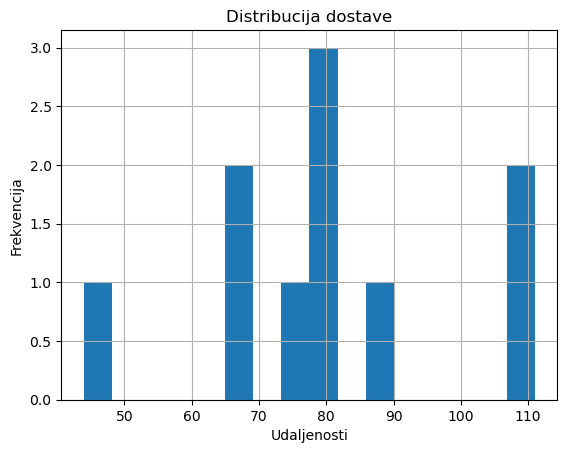

In [46]:
dostava['Udaljenost'].hist(bins=16)
plt.xlabel('Udaljenosti')
plt.ylabel('Frekvencija')
plt.title('Distribucija dostave')
plt.grid(True)
plt.show()

In [47]:
### Iz grafa se vidi kako najviše dostava čije udaljenosti iznose od 65-90
### ekstremi (44 ili 111) su rijetke pojave te u odnosu na najčešće pojave udaljnosti mogu biti smatrane 
### kao outlier-i.

In [48]:
dostava.corr()

,Udaljenost,BrDostava,CijenaGoriva,Vrijeme
Udaljenost,1.000000,0.956638,0.345927,0.929703
BrDostava,0.956638,1.000000,0.498242,0.916443
CijenaGoriva,0.345927,0.498242,1.000000,0.267212
Vrijeme,0.929703,0.916443,0.267212,1.000000


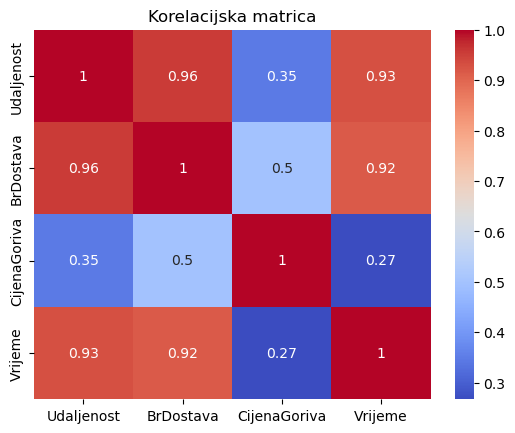

In [49]:
sns.heatmap(dostava.corr(), annot=True, cmap='coolwarm')
plt.title('Korelacijska matrica')
plt.show()

In [50]:
### Iz korelacije je vidljivo da Udaljenost najbolju pozitivnu korilaciju ostvaruje sa BrDostava 
### (0.956638) te s Vrijeme(0.929703), a najslabije s CijenaGoriva

### Zaključak: Vrijeme je zavisna varijabla jer ovisi o Udaljenosti i Broju dostava. Što su Udaljenost i 
### BrDostava veće, produžava se varijabla vrijeme. Cijena goriva može indirektno utjecati na varijablu
### Vrijeme sporijom vožnjom

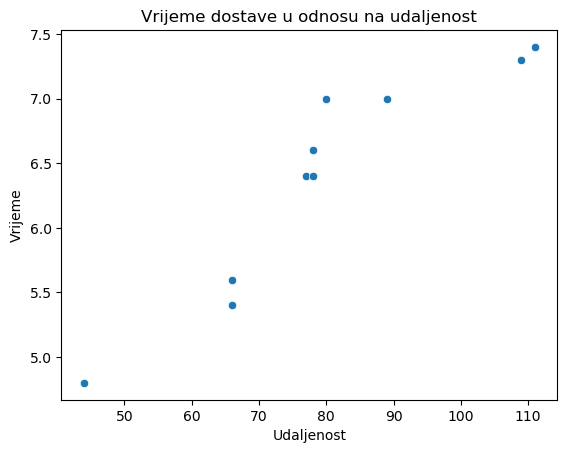

In [51]:
sns.scatterplot(data=dostava, x="Udaljenost", y="Vrijeme")
plt.title("Vrijeme dostave u odnosu na udaljenost")
plt.show()

In [52]:
### Vrijeme - Udaljenost 

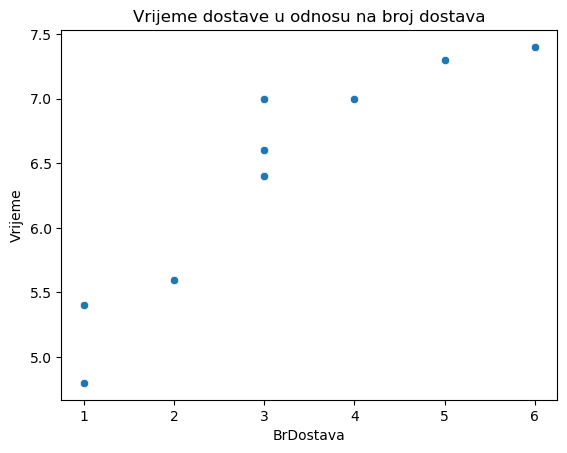

In [53]:
sns.scatterplot(data=dostava, x="BrDostava", y="Vrijeme")
plt.title("Vrijeme dostave u odnosu na broj dostava")
plt.show()

In [54]:
### Vrijeme - Broj dostva

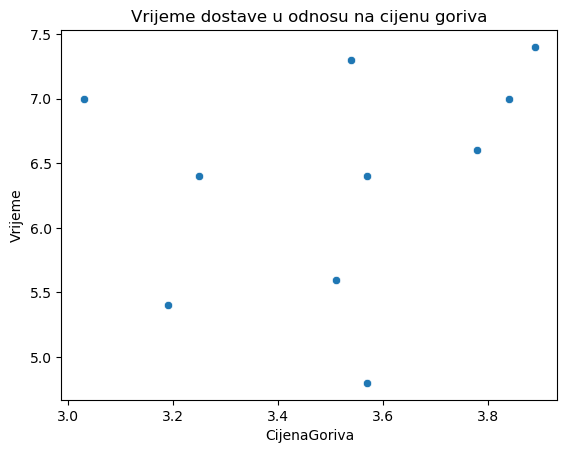

In [55]:
sns.scatterplot(data=dostava, x="CijenaGoriva", y="Vrijeme")
plt.title("Vrijeme dostave u odnosu na cijenu goriva")
plt.show()

In [56]:
### Vrijeme - Cijena goriva: podaci su jako raspršeni i nema dobre korelacije, pa možemo zaključiti kako
### cijena goriva nema izravan utjecaj na Vrijeme dostave

In [57]:
udaljenost = dostava['Udaljenost'].agg(
    Min='min',
    Mean='mean',
    Max='max'
).reset_index()

udaljenost

,index,Udaljenost
0,Min,44.0
1,Mean,79.8
2,Max,111.0


In [58]:
### Udaljenost koju dostavljač treba prijeći (najmanja, srednja i najveća)

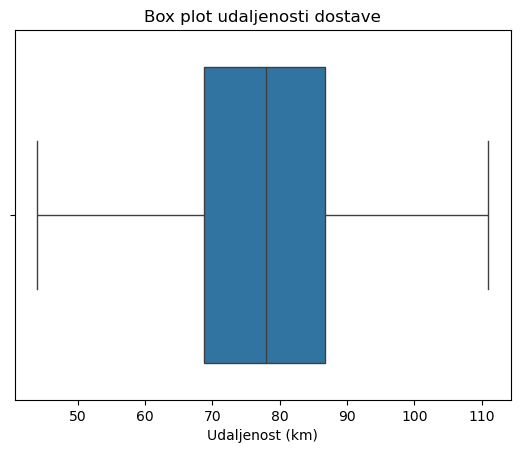

In [59]:
sns.boxplot(x=dostava['Udaljenost'])
plt.title('Box plot udaljenosti dostave')
plt.xlabel('Udaljenost (km)')
plt.show()

In [60]:
### Grafički prikaz iz kojeg se vidi da je prosječna udaljenost iznosi cca 78km, a raspon iznosi
### od cca 68km do 87km.

In [61]:
freq = dostava['BrDostava'].value_counts().sort_index()
freq

BrDostava
1    2
2    1
3    4
4    1
5    1
6    1
Name: count, dtype: int64

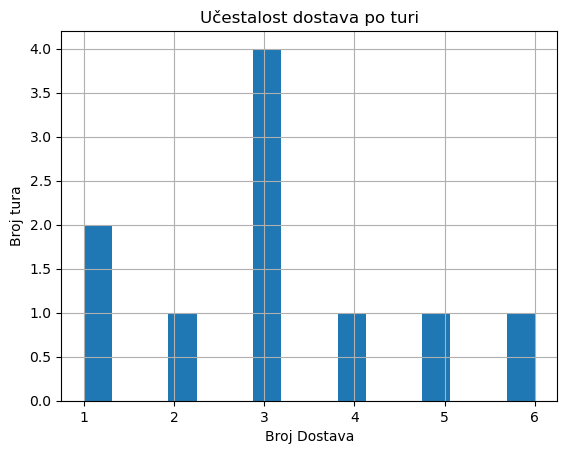

In [62]:
dostava['BrDostava'].hist(bins=16)
plt.xlabel('Broj Dostava')
plt.ylabel('Broj tura')
plt.title('Učestalost dostava po turi')
plt.grid(True)
plt.show()

In [63]:
### iz tabličnog i grafičkog prikaza vidi se da se najčešće rade četiri dostave po turi, a takvih tura 
### je bilo 3.

In [64]:
cijena_goriva = dostava['CijenaGoriva'].value_counts().sort_index()
cijena_goriva

CijenaGoriva
3.03    1
3.19    1
3.25    1
3.51    1
3.54    1
3.57    2
3.78    1
3.84    1
3.89    1
Name: count, dtype: int64

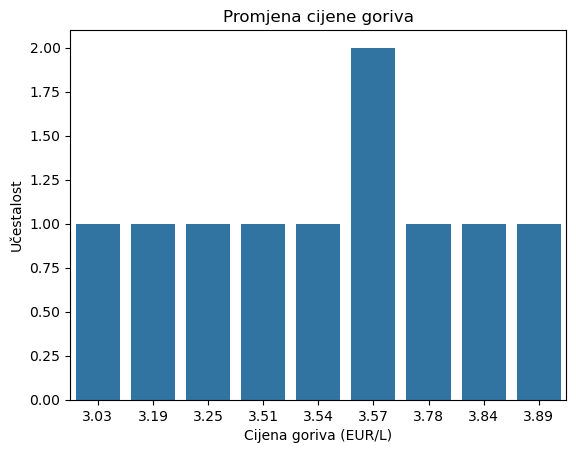

In [65]:
sns.barplot(x=cijena_goriva.index, y=cijena_goriva.values)
plt.xlabel('Cijena goriva (EUR/L)')
plt.ylabel('Učestalost')
plt.title('Promjena cijene goriva')
plt.show()

In [66]:
### Zaključak: vidljiv je rast cijene goriva, ali ta varijabla nema direktan utjecaj na vrijeme dostave
### što se vidjelo iz korelacije. Rast cijene goriva može direktno utjecati na cijenu usluge, ali to 
### nije dio ove analize...